# Proyek Analisis Data: Nama dataset
- Nama: Muhamad Fauzan Rizky Adisty Erlangga
- Email: frizky.erlang@gmail.com
- Id Dicoding: frizky12

## Menentukan Pertanyaan Bisnis

- Pada waktu apa peminjaman sepeda paling ramai?
- Bagaimana pengaruh cuaca pada jumlah peminjaman sepeda?
- Bagaimana perbandingan registered user dengan casual user?

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Daily Data

Load tabel hari-an (daily basis) aggregat dari peminjaman sepeda dan menampilkan 5 baris pertamanya

In [2]:
daily_df = pd.read_csv(filepath_or_buffer="./data/day.csv")

daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Untuk acuan, pada file ./data/readme.txt terlihat jika dataset yang digunakan (baik hour.csv maupun day.csv) memiliki karakteristik sebagai berikut:

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Daily Data

Melihat info dataframe dari tabel hari-an dengan info()

In [3]:
print("Jumlah data seharusnya (2 tahun): ", (365+366))
print("Jumlah data hourly_df: ", daily_df.shape[0])
daily_df.info()

Jumlah data seharusnya (2 tahun):  731
Jumlah data hourly_df:  731
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari info diatas terlihat jika setiap cell tabel tidak memiliki data non-null. Namun terdapat kesalahan tipe data pada kolom dteday yang harusnya bertipe data datetime.

Selanjutnya akan dilihat deskripsi dataframe dari tabel hari-an dengan describe()

In [4]:
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari deskripsi di atas terlihat jika setiap kolom data memiliki rentang nilai yang sesuai dengan karakteristik dataset. Meski begitu nilai pada kolom temp, atemp, hum, dan windspeed nilainya ternomalisasi, hal ini sangat membantu untuk process yang menggunakan Machine Learning. Sehingga nilai pada kolom tersebut perlu dikembalikan ke nilai sebelum ternormalisasi.

Selanjutnya ialah mengecek adanya duplikasi data

In [5]:
print("Jumlah duplikasi: ", daily_df.duplicated().sum())

Jumlah duplikasi:  0


Dari kode diatas terlihat jika tidak terdapat duplikasi pada tabel jam-an

### Cleaning Data

Dari tahap Assessing Data teridentifikasi beberapa masalah yaitu:

|           | Tipe data                              | Missing value | Duplicate data | Inaccurate data                                              |
|-----------|----------------------------------------|---------------|----------------|--------------------------------------------------------------|
| daily_df  | Kesalahan tipe data pada kolom dteday  | -             | -              | Kolom temp, atemp, hum, dan windspeed nilainya ternomalisasi |

#### Daily Data

##### Kesalahan Tipe Data

Untuk mengatasi kesalahan tipe data, akan digunakan to_datetime() yang merupakan fungsi bawaan dari Pandas Library

In [6]:
daily_df["dteday"] = pd.to_datetime(daily_df["dteday"])

daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat jika tipe data dari kolom dteday telah berhasil diubah ke datetime

##### Kesalahan Akurasi Data

Pada data kolom temp, atemp, hum, dan windspeed nilainya ternomalisasi. Sehingga perlu dikembalikan nilainya ke nilai semula, hal ini dapat dilakukan dengan mengalikan dataset dengan nilai yang tertera pada file Readme.txt yang disediakan dataset.

In [7]:
col = {"temp":41, "atemp":50, "hum":100, "windspeed":67}

for colName, colValue in col.items():
    daily_df[colName] = np.multiply(daily_df[colName],colValue)
    
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
daily_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


Terlihat jika nilai pada kolom yang ternomalisasi sudah kembali ke nilai tak ternormalisasi. Selain itu nilainya juga berada pada rentang nilai wajar

## Exploratory Data Analysis (EDA)

### Explore Data daily_df

Untuk memperoleh rangkuman statistik dari dataframe, kita dapat memakai fungsi describe() yang merupakan bawaan dari pandas. Agar fungsi describe() memmproses seluruh kolom (bukan hanya numerik), kita dapat memberikan parameter include="all".

In [9]:
daily_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


Berdasarkan rangkuman statistik diatas dapat dilihat jika rata-rata jumlah peminjam sepeda didominasi oleh registered user ($\pm$ 3656 user) dibandingkan dengan casual user ($\pm$ 848 user)

Untuk melihat pengaruh musim dan cuaca kita dapat melakukan grouping dari kolom season. Lalu melakukan metode aggregate untuk temp, atemp, hum, dan windspeed secara mean, max, dan min. Serta untuk kolom casual, registered, dan cnt secara sum. Selain itu untuk memudahkan pembacaaan, representasi season akan diganti dengan nama musimnya. untuk hal itu, digunakan fungsi copy(deep=True) dari pandas untuk mengcopy dataframe menjadi objek baru yang tidak berupa reference

In [10]:
# mengganti season ke namanya
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
daily_df_season = daily_df.copy(deep=True)
daily_df_season["season"] = daily_df_season["season"].replace(season_map)

In [11]:
daily_df_season.groupby(by="season").agg({
    "temp": ["max","min","mean"],
    "atemp": ["max","min","mean"],
    "hum": ["max","min","mean"],
    "windspeed": ["max","min","mean"],
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

temp                           atemp                       \
              max        min       mean       max       min       mean   
season                                                                   
Fall    35.328347  19.235847  28.958682  42.04480  12.12000  32.794920   
Spring  23.472500   2.424346  12.207650  27.43085   3.95348  14.845697   
Summer  33.141653  10.374763  22.320611  37.87895  12.51695  26.015366   
Winter  26.957500   9.054153  17.339148  30.39875  11.39565  20.776937   

            hum                      windspeed                       casual  \
            max      min       mean        max       min       mean     sum   
season                                                                        
Fall    93.9565  36.0000  63.348206  25.166339  4.292744  11.530366  226091   
Spring  94.8261   0.0000  58.290291  34.000021  3.042356  14.373984   60622   
Summer  92.2500  25.4167  62.694833  26.000489  4.417256  13.634978  203522   
Winter  97.2500  33.3478  66.871917  28.292425  1.500244  11.523637  129782   

       registered      cnt  
              sum      sum  
season                      
Fall       835038  1061129  
Spring     410726   471348  
Summer     715067   918589  
Winter     711831   841613

Terlihat jika peminjaman sepeda paling banyak pada saat musim gugur (Fall) dan paling sedikit saat musim semi (Spring). Selain itu terlihat jika total peminjaman sepeda ada pengaruh dari temp (suhu udara) dan atemp (suhu udara yang dirasa) dari kolom mean, max, dan min. Sedangkan untuk hum (kelembapan) dan windspeed (kecepatan angin) kurang begitu terlihat. Sehinga akan dicoba untuk menghitung korelasi cuaca terhadap jumlah peminjaman

In [12]:
x = {"Musim":"season", "Suhu":"temp", "Suhu yang dirasa":"atemp", "Kelembapan":"hum", "Kecepatan angin":"windspeed"}

for i, j in x.items():
    print("Korelasi antara", i, "dengan jumlah peminjaman sepeda adalah", str(daily_df["cnt"].corr(daily_df[j])))


Korelasi antara Musim dengan jumlah peminjaman sepeda adalah 0.4061003707986361
Korelasi antara Suhu dengan jumlah peminjaman sepeda adalah 0.6274940090334921
Korelasi antara Suhu yang dirasa dengan jumlah peminjaman sepeda adalah 0.6310656998491814
Korelasi antara Kelembapan dengan jumlah peminjaman sepeda adalah -0.10065856213715525
Korelasi antara Kecepatan angin dengan jumlah peminjaman sepeda adalah -0.23454499742167004


Terlihat jika jumlah peminjaman memiliki korelasi yang kuat terhadaap suhu. Untuk musim terdapat korelasi sedang, sedangkan untuk kelembapan dan kecepatan angin korelasinya kecil sehingga dapat diabaikan (di drop kolomnya).

Selanjutnya yang hal menarik lainnya adalah hubungan hari kerja, hari libur, dan akhir pekan terhadap peminjaman sepeda. Untuk menentukan hari libur, dapat dilakukan dengan memproses kolom holiday dan workingday

In [13]:
def categorize(workday, holday):
    if workday == 1:
        return "hari_kerja"
    elif holday == 1:
        return "hari_libur"
    else :
        return "akhir_pekan"

In [14]:
daily_df_status_day = daily_df[["workingday", "holiday", "casual", "registered", "cnt"]].copy(deep=True)
daily_df_status_day["status_day"] = daily_df_status_day.apply(lambda x: categorize(x["workingday"], x["holiday"]), axis=1)
daily_df_status_day.head()

,workingday,holiday,casual,registered,cnt,status_day
0,0,0,331,654,985,akhir_pekan
1,0,0,131,670,801,akhir_pekan
2,1,0,120,1229,1349,hari_kerja
3,1,0,108,1454,1562,hari_kerja
4,1,0,82,1518,1600,hari_kerja


In [15]:
daily_df_status_day.describe(include="all")

,workingday,holiday,casual,registered,cnt,status_day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,hari_kerja
freq,NaN,NaN,NaN,NaN,NaN,500
mean,0.683995,0.028728,848.176471,3656.172367,4504.348837,NaN
std,0.465233,0.167155,686.622488,1560.256377,1937.211452,NaN
min,0.000000,0.000000,2.000000,20.000000,22.000000,NaN
25%,0.000000,0.000000,315.500000,2497.000000,3152.000000,NaN
50%,1.000000,0.000000,713.000000,3662.000000,4548.000000,NaN
75%,1.000000,0.000000,1096.000000,4776.500000,5956.000000,NaN


Setelah itu dilakukan lagi grouping berdasarkan status_day dan di aggregate kolom casual, registered, dan cnt secara mean. Dilakukan secara mean dikarenakan jumlah data untuk tiap kategori sangat jauh berbeda, sehingga jika memakai sum akan dominan yang jumlah datanya banyak.

In [16]:
daily_df_status_day.groupby(by="status_day").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean",
})

,casual,registered,cnt
status_day,,,
akhir_pekan,1401.776190,2987.909524,4389.685714
hari_kerja,606.570000,3978.250000,4584.820000
hari_libur,1064.714286,2670.285714,3735.000000


Terlihat jika kondisi hari berpengaruh dengan rata-rata jumlah harian peminjaman sepeda. 

Selain itu kita juga dapat melihat grouping data daily_df berdasarkan weathersit, lalu meng-aggregate casual, registered, dan cnt berdasarkan mean dan sum

In [17]:
daily_df.groupby(by="weathersit").agg({
    "casual": ["sum","mean"],
    "registered": ["sum","mean"],
    "cnt": ["sum","mean"],
})

casual             registered                   cnt             
               sum        mean        sum         mean      sum         mean
weathersit                                                                  
1           446346  964.030238    1811606  3912.755940  2257952  4876.786177
2           169776  687.352227     827082  3348.510121   996858  4035.862348
3             3895  185.476190      33974  1617.809524    37869  1803.285714

Terlihat jika kondisi cuaca mempengaruhi jumlah harian peminjaman sepeda. ketika kondisi cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (3) jumlah peminjaman akan sedikit dibanding saat kondisi cuaca Clear, Few clouds, Partly cloudy, Partly cloudy (1)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada waktu apa peminjaman sepeda paling ramai?

Untuk melihat kondisi peminjaman paling ramai, dapat dilakukan line plot antara kolom dteday dan kolom cnt, registered, casual untuk melihat peminjaman paling ramai

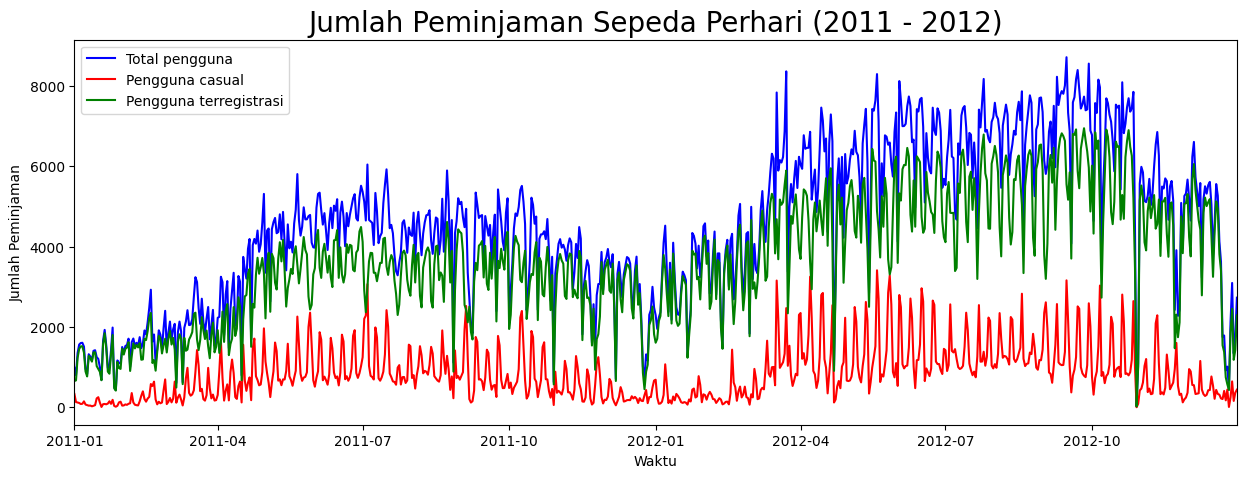

In [18]:
plt.figure(figsize=(15,5))
plt.plot(daily_df["dteday"],daily_df["cnt"], linewidth=1.5, color="b", label="Total pengguna")
plt.plot(daily_df["dteday"],daily_df["casual"], linewidth=1.5, color="r", label="Pengguna casual")
plt.plot(daily_df["dteday"],daily_df["registered"], linewidth=1.5, color="g", label="Pengguna terregistrasi")

plt.legend(loc="upper left")
plt.title(label="Jumlah Peminjaman Sepeda Perhari (2011 - 2012)", fontsize=20)
plt.ylabel(ylabel="Jumlah Peminjaman")
plt.xlabel(xlabel="Waktu")
plt.xlim(np.min(daily_df["dteday"]),np.max(daily_df["dteday"]))
plt.show()

Terlihat pada data 2 tahun tersebut peminjaman sepeda selalu ramai pada sekitar bulan 7 (Juli). Untuk lebih jelasnya, akan dilakukan plot pada data akumulasi bulanan

In [19]:
monthly_daily_df = daily_df.resample(rule="M", on="dteday").agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_daily_df['label'] = monthly_daily_df.index.strftime('%b-%Y')
monthly_daily_df.reset_index(inplace=True)
monthly_daily_df

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,label
0,2011-01-31,8.105974,10.224479,58.436635,13.093060,3073,35116,38189,Jan-2011
1,2011-02-28,11.584143,14.220620,56.009311,15.314059,6242,41973,48215,Feb-2011
2,2011-03-31,13.598330,16.264958,56.941384,15.571321,12826,51219,64045,Mar-2011
3,2011-04-30,19.318726,22.838745,66.828740,16.362499,22346,72524,94870,Apr-2011
4,2011-05-31,23.666480,27.540681,71.336019,12.145379,31050,104771,135821,May-2011
5,2011-06-30,28.416417,32.327972,59.324997,11.939090,30612,112900,143512,Jun-2011
6,2011-07-31,31.101588,35.533008,58.966397,11.501716,36452,104889,141341,Jul-2011
7,2011-08-31,28.919847,32.770758,62.683113,12.778276,28842,107849,136691,Aug-2011
8,2011-09-30,25.128349,28.427252,78.405377,10.250290,26545,100873,127418,Sep-2011
9,2011-10-31,19.268996,22.938811,70.679468,11.770932,25222,98289,123511,Oct-2011


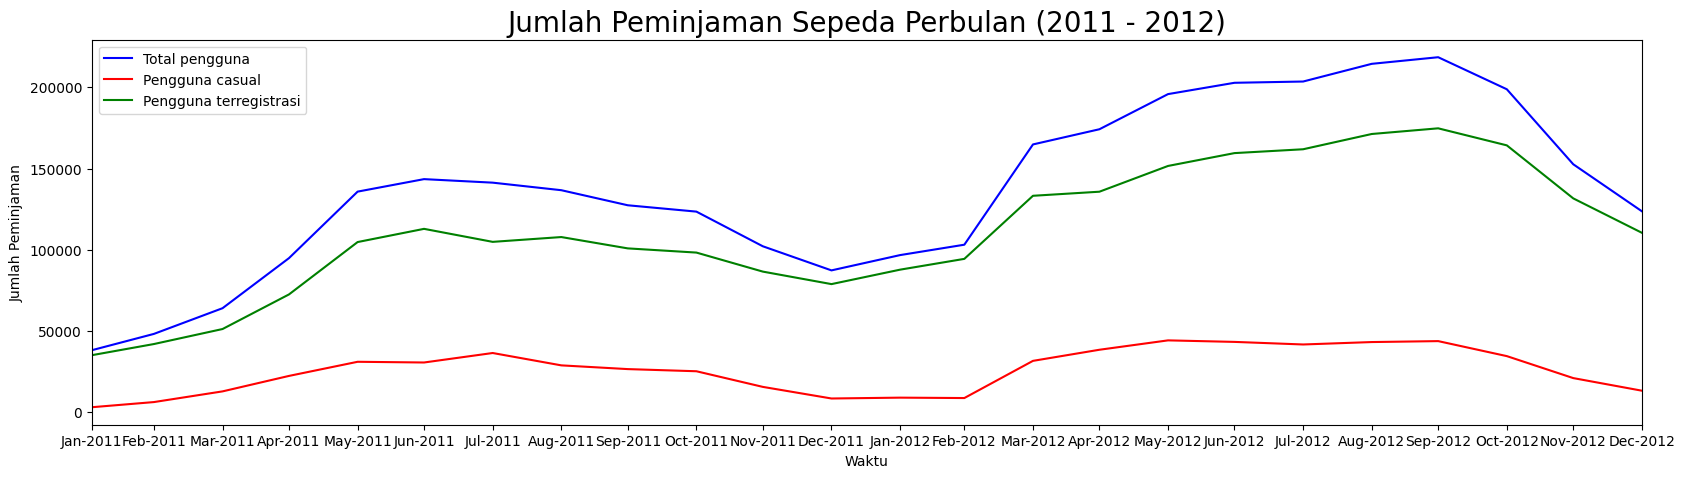

In [20]:
plt.figure(figsize=(20,5))
plt.plot(monthly_daily_df["dteday"],monthly_daily_df["cnt"], linewidth=1.5, color="b", label="Total pengguna")
plt.plot(monthly_daily_df["dteday"],monthly_daily_df["casual"], linewidth=1.5, color="r", label="Pengguna casual")
plt.plot(monthly_daily_df["dteday"],monthly_daily_df["registered"], linewidth=1.5, color="g", label="Pengguna terregistrasi")

plt.legend(loc="upper left")
plt.title(label="Jumlah Peminjaman Sepeda Perbulan (2011 - 2012)", fontsize=20)
plt.ylabel(ylabel="Jumlah Peminjaman")
plt.xlabel(xlabel="Waktu")
plt.xticks(ticks=monthly_daily_df["dteday"],labels=monthly_daily_df["label"])
plt.xlim(np.min(monthly_daily_df["dteday"]),np.max(monthly_daily_df["dteday"]))
plt.show()

Dari plot diatas terlihat jika peminjaman sepeda akan ramai pada rentang bulan Mei hingga bulan September

Selain dari rentang bulan, kita dapat mengecek keramaian berdasarkan status hari (hari kerja, hari libur, akhir pekan)

In [21]:
status_daily_df = daily_df_status_day.groupby("status_day").agg({
    "status_day": "size",
    "casual": ["sum","mean"],
    "registered": ["sum","mean"],
    "cnt": ["sum","mean"],
})
status_daily_df.reset_index(inplace=True)

# merging kolomnya agar tidak berupa multilevel index
def merge_kolom(x):
    return x[0]+"_"+x[1] if isinstance(x, tuple) else x

status_daily_df.columns = status_daily_df.columns.map(merge_kolom)
status_daily_df

,status_day_,status_day_size,casual_sum,casual_mean,registered_sum,registered_mean,cnt_sum,cnt_mean
0,akhir_pekan,210,294373,1401.776190,627461,2987.909524,921834,4389.685714
1,hari_kerja,500,303285,606.570000,1989125,3978.250000,2292410,4584.820000
2,hari_libur,21,22359,1064.714286,56076,2670.285714,78435,3735.000000


Dari dataframe diatas menunjukkan jika jumlah hari yang merepresentasikan tiap kondisi hari (akhir pekan, hari kerja, hari libur) jumlahnya sangat berbeda sehingga untuk divisualisasikan akan digunakan nilai rata-rata.

In [22]:
status_daily_df.drop(columns=[
    "status_day_size",
    "casual_sum",
    "registered_sum",
    "cnt_sum"
], inplace=True)
status_daily_df.sort_values(by="cnt_mean", ascending=True, inplace=True)
status_daily_df

,status_day_,casual_mean,registered_mean,cnt_mean
2,hari_libur,1064.714286,2670.285714,3735.000000
0,akhir_pekan,1401.776190,2987.909524,4389.685714
1,hari_kerja,606.570000,3978.250000,4584.820000


<function matplotlib.pyplot.show(close=None, block=None)>

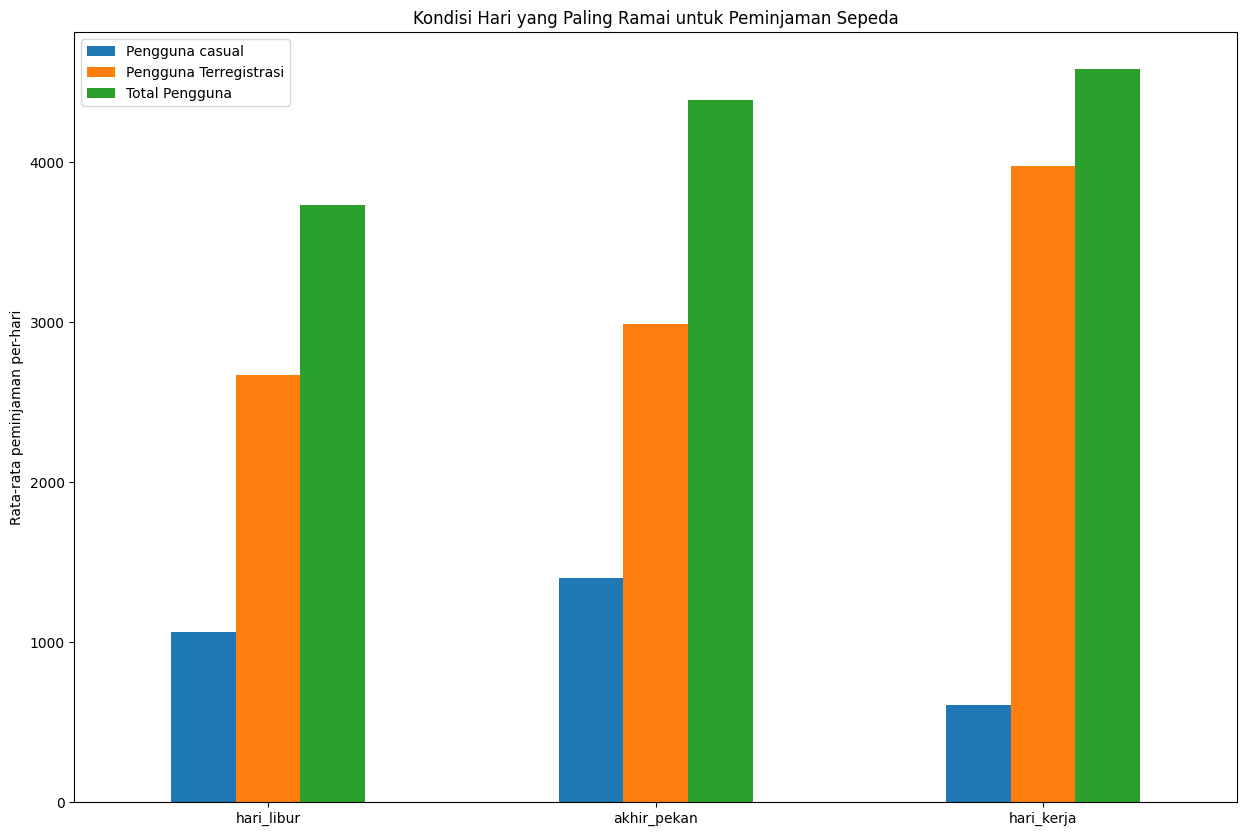

In [23]:
status_daily_df.plot(
    kind="bar",
    x="status_day_",
    figsize=(15,10),
)
plt.title(label="Kondisi Hari yang Paling Ramai untuk Peminjaman Sepeda")
plt.ylabel(ylabel="Rata-rata peminjaman per-hari")
plt.xlabel(xlabel=None)
plt.xticks(rotation=0)
plt.legend(
    labels=["Pengguna casual","Pengguna Terregistrasi","Total Pengguna"],
    loc="upper left",
)
plt.show

Terlihat jika pengguna casual lebih ramai meminjam sepeda pada saat hari libur dan hari kerja sedangkan untuk pengguna terregistrasi lebih ramai meminjam saat hari kerja.

### Pertanyaan 2: Bagaimana pengaruh cuaca pada jumlah peminjaman sepeda?

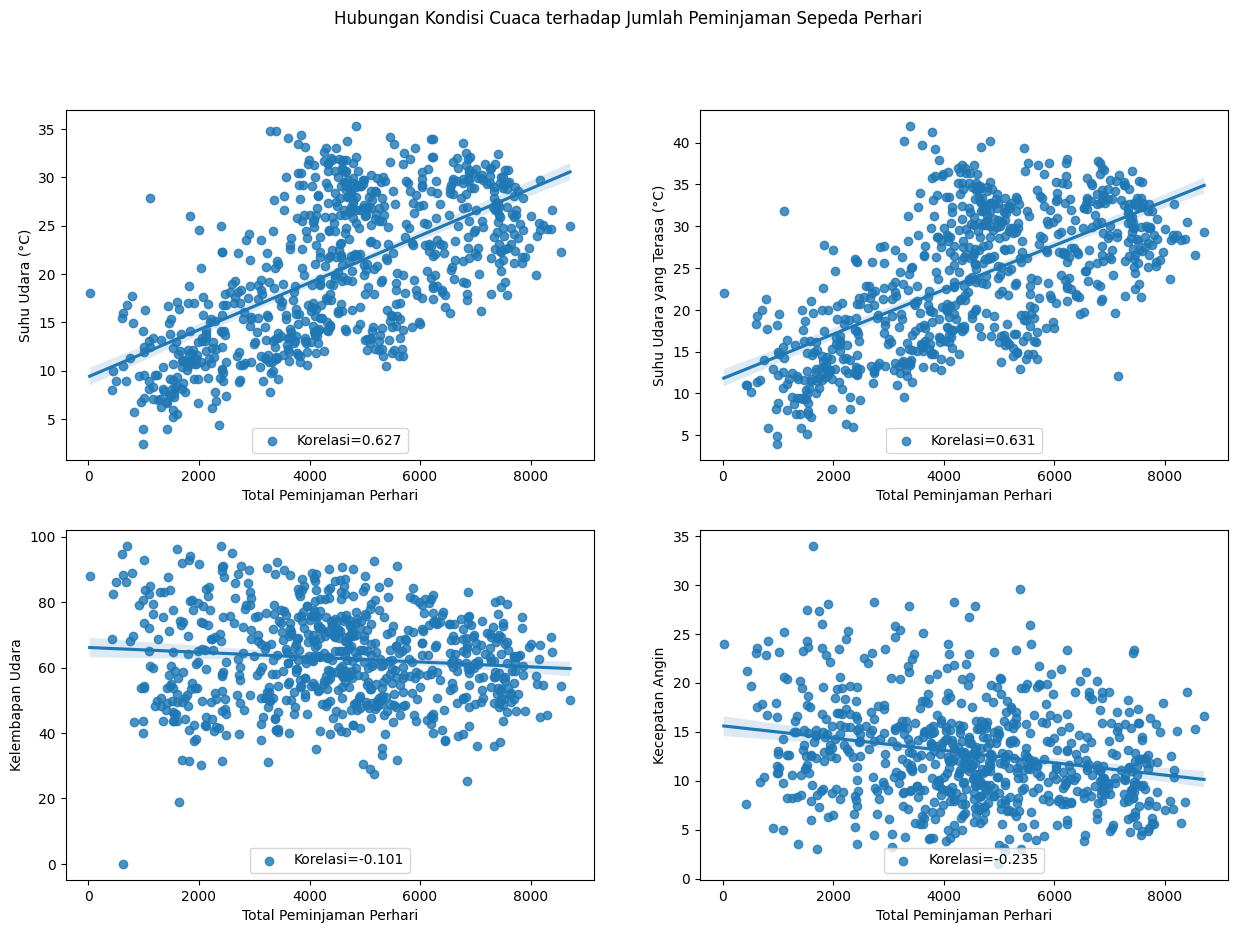

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

sns.regplot(
    x="cnt",
    y="temp",
    data=daily_df,
    ax=ax[0][0],
)
ax[0][0].set_xlabel("Total Peminjaman Perhari")
ax[0][0].set_ylabel("Suhu Udara (°C)")
ax[0][0].legend(
    loc="lower center",
    labels=["Korelasi="+str(round(daily_df["cnt"].corr(daily_df['temp']),3))],
)

sns.regplot(
    x="cnt",
    y="atemp",
    data=daily_df,
    ax=ax[0][1],
)
ax[0][1].set_xlabel("Total Peminjaman Perhari")
ax[0][1].set_ylabel("Suhu Udara yang Terasa (°C)")
ax[0][1].legend(
    loc="lower center",
    labels=["Korelasi="+str(round(daily_df["cnt"].corr(daily_df['atemp']),3))],
)

sns.regplot(
    x="cnt",
    y="hum",
    data=daily_df,
    ax=ax[1][0],
)
ax[1][0].set_xlabel("Total Peminjaman Perhari")
ax[1][0].set_ylabel("Kelembapan Udara")
ax[1][0].legend(
    loc="lower center",
    labels=["Korelasi="+str(round(daily_df["cnt"].corr(daily_df['hum']),3))],
)

sns.regplot(
    x="cnt",
    y="windspeed",
    data=daily_df,
    ax=ax[1][1],
)
ax[1][1].set_xlabel("Total Peminjaman Perhari")
ax[1][1].set_ylabel("Kecepatan Angin")
ax[1][1].legend(
    loc="lower center",
    labels=["Korelasi="+str(round(daily_df["cnt"].corr(daily_df['windspeed']),3))],
    )

plt.suptitle("Hubungan Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda Perhari")
plt.show()

Dari ke-4 plot diatas terlihat jika yang cukup mempengaruhi jumlah peminjaman sepeda perhari adalah kondisi suhu udara, sedangkan untuk kecepatan angin dan kelembapan udara korelasinya rendah dan dari scatternya lebih tersebar.

Lalu untuk kondisi cuaca dapat pada hari tersebut dapat dilihat menggunakan barplot antara kondisi cuaca (weathersit) dengan jumlah peminjaman sepeda

In [25]:
weather_daily_df = daily_df.groupby(by="weathersit").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean",
})

weather_daily_df.reset_index(inplace=True)
weather_daily_df.sort_values(by="cnt", inplace=True)
weather_map = {1: 'cerah/sedikit berawan', 2: 'berawan/berkabut', 3: 'hujan/salju'}
weather_daily_df["weathersit"] = weather_daily_df["weathersit"].replace(weather_map)
weather_daily_df

,weathersit,casual,registered,cnt
2,hujan/salju,185.476190,1617.809524,1803.285714
1,berawan/berkabut,687.352227,3348.510121,4035.862348
0,cerah/sedikit berawan,964.030238,3912.755940,4876.786177


<function matplotlib.pyplot.show(close=None, block=None)>

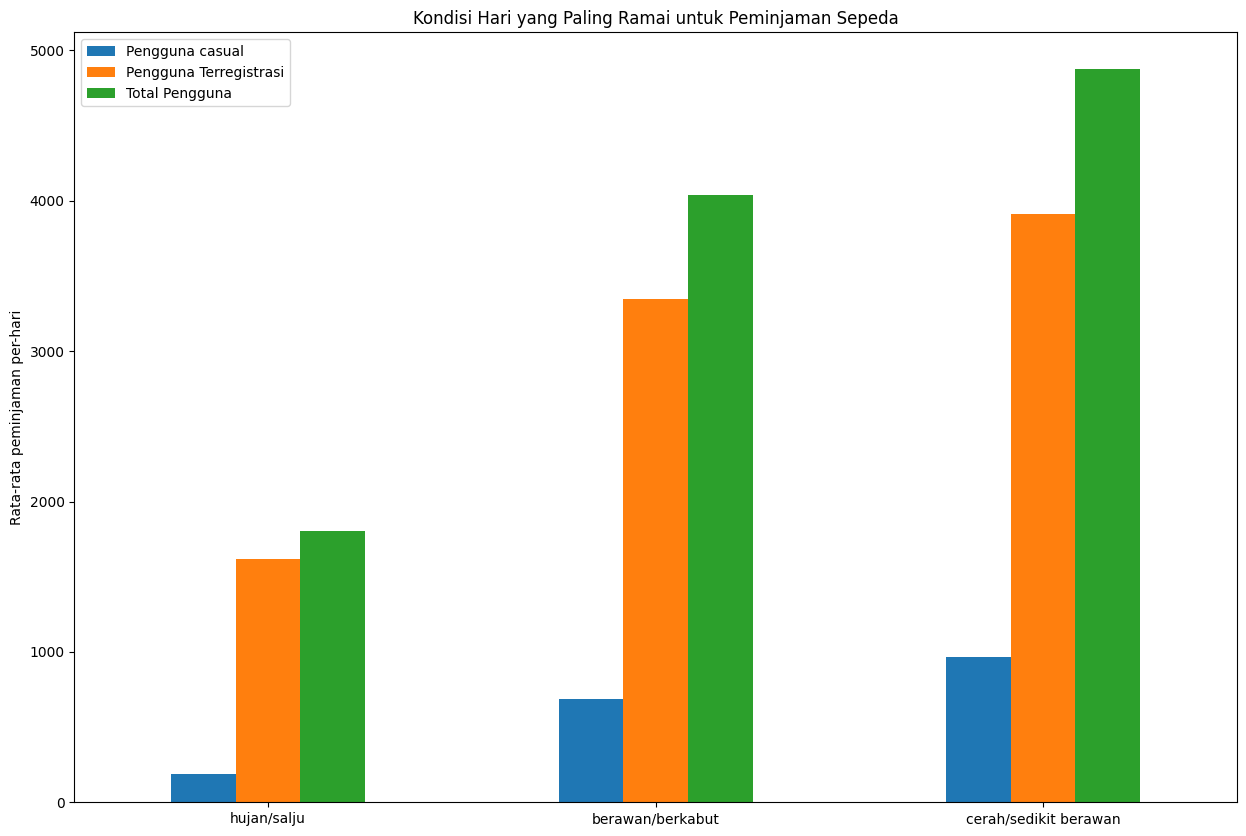

In [26]:
weather_daily_df.plot(
    kind="bar",
    x="weathersit",
    figsize=(15,10),
)
plt.title(label="Kondisi Hari yang Paling Ramai untuk Peminjaman Sepeda")
plt.ylabel(ylabel="Rata-rata peminjaman per-hari")
plt.xlabel(xlabel=None)
plt.xticks(rotation=0)
plt.legend(
    labels=["Pengguna casual","Pengguna Terregistrasi","Total Pengguna"],
    loc="upper left",
)
plt.show

Terlihat kondisi cuaca akan mempengaruhi jumlah peminjaman cuaca, dimana semakin cerah cuacanya maka semakin banyak sepeda yang dipinjam

### Pertanyaan 3: Bagaimana perbandingan registered user dengan casual user?

In [27]:
user_daily_df = daily_df.agg({
    "casual": "sum",
    "registered": "sum",
})
user_daily_df = pd.DataFrame(user_daily_df)
user_daily_df.reset_index(inplace=True, names="user")
user_daily_df

,user,0
0,casual,620017
1,registered,2672662


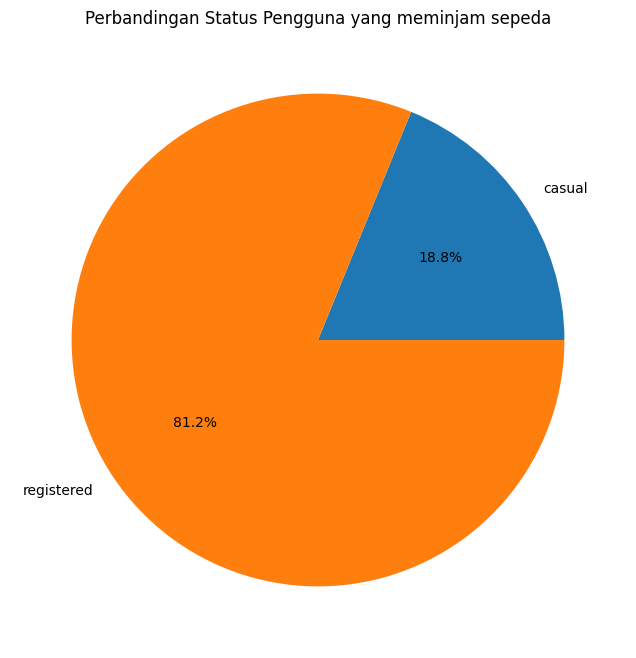

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(
    x=user_daily_df[0],
    labels=user_daily_df["user"],  
    autopct='%1.1f%%',  
)
plt.title(label="Perbandingan Status Pengguna yang meminjam sepeda")
plt.show()

Dari gambar diatas terlihat jika mayoritas pengguna Bike Sharing adalah pengguna terregistrasi dibandingkan dengan pengguna casual

## Conclusion

- Peminjaman sepeda paling ramai ketika bulan Mei - September. Serta pengguna casual lebih ramai meminjam pada hari libur, sedangkan pengguna terregistrasi lebih ramai pada hari kerja.
- Terdapat pengaruh suhu udara terhadap jumlah peminjaman perhari (korelasi > 0,6). Serta semakin cerah cuaca akan meningkatkan jumlah peminjaman sepeda.
- Mayoritas pengguna adalah pengguna terregistrasi (>80%)

Selanjutnya adalah mempersiapkan data untuk pembuatan dashboard streamlit 
block code dibawah ini hanya perlu dijalankan ketika ingin membuat main_data.csv saja. untuk menjalankannya harap un-comment block code berikut:

In [29]:
# all_df = daily_df_season.copy(deep=True)
# all_df["weathersit"] = all_df["weathersit"].replace(weather_map)
# all_df.drop(columns=["yr", "mnth", "weekday", "instant"], inplace=True)
# all_df.to_csv(path_or_buf="./dashboard/main_data.csv", index=False)
# all_df